#Problem Set 2 (due 5th November 2024) - Michele Magrini

In [ ]:
#@title import dependencies
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.special import erf, erfinv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.1 MB/s eta 0:00:00


## Exercise 1

###1.0
Calculate the distance between two plate rotation vectors. Give the solid angle and the surface distance of the following:

North America-Pacific (PwNA): 48.7°N 78.2°W


Nazca-Pacific (PwNZ): 55.6°N 90.1°W

In [ ]:
def angular_distance(p1, p2, verbose = False) -> float:
  D2R = np.pi/180
  lat1 = D2R*p1[0]
  lon1 = D2R*p1[1]
  lat2 = D2R*p2[0]
  lon2 = D2R*p2[1]

  A = abs(lon2-lon1);

  a = np.arccos( np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(A) );

  if verbose:
    print("Angular distance from {} to {} is {:0.2f} deg or {:0.2f} rad. \nSurface distance is {:0.2f} (km), for points: ({:0.2f}, {:0.2f}), ({:0.2f}, {:0.2f}).\n".format(p1[-1],p2[-1],a/D2R, a, a*6371, lat1/D2R, lon1/D2R, lat2/D2R, lon2/D2R))

  #only returns solid angle in radians
  return a

In [ ]:
PwNA = (48.7, -78.2, "North America-Pacific")
PwNZ = (55.6, -90.1, "Nazca-Pacific")
angular_distance(PwNA, PwNZ, verbose = True)
pass

Angular distance from North America-Pacific to Nazca-Pacific is 10.02 deg or 0.17 rad. 
Surface distance is 1114.29 (km), for points: (48.70, -78.20), (55.60, -90.10).



###1.1
Now let’s calculate the relative plate tectonic motion for a point near San Francisco along the San Andreas Fault.

The plate rotation vector is:

North America-Pacific (PwNA): 48.7°N, 78.2°W, 7.8x10-7 (deg/year)

Determine the magnitude of the relative linear velocity at the town of Parkfield CA along the San Andreas Fault at: 35° 54' N, 120° 26' W

In [ ]:
def calculate_magn_relative_velocity(plate_rotation_vector, location, verbose = False):
  R = 6371 #km
  D2R = np.pi/180
  angular_speed_rad = D2R*plate_rotation_vector[2]
  a = angular_distance([plate_rotation_vector[i] for i in (0,1,3)], location, verbose)
  velocity = R*np.sin(a)*angular_speed_rad #km/yr

  if verbose:
    print("The magnitude of the linear velocity at {} relative to the {} plate is: \n{:0.4f} km/yr \n{:0.4f} m/yr \n{:0.4f} cm/yr".format(location[-1], plate_rotation_vector[-1], velocity, velocity*1e3, velocity*1e5))

  #returns relative linear velocity at the location
  return velocity

In [ ]:
PwNA = (48.7, -78.2, 7.8e-7, "North America-Pacific")
P = (35.9, -120.43, "Parkfield CA")
calculate_magn_relative_velocity(PwNA, P, True)
pass

Angular distance from North America-Pacific to Parkfield CA is 33.24 deg or 0.58 rad. 
Surface distance is 3696.05 (km), for points: (48.70, -78.20), (35.90, -120.43).

The magnitude of the linear velocity at Parkfield CA relative to the North America-Pacific plate is: 
0.0000 km/yr 
0.0475 m/yr 
4.7541 cm/yr


###1.2
Calculate the complete vector motion at Parkfield CA.

Give the magnitude and direction of the velocity vector V.

In [ ]:
def calculate_relative_velocity(plate_rotation_vector, location, verbose):
  R = 6371 #km
  D2R = np.pi/180

  colat1 = (90-plate_rotation_vector[0])*D2R
  colat2 = (90-location[0])*D2R

  wx = np.sin(colat1)*np.cos(plate_rotation_vector[1]*D2R)*plate_rotation_vector[2]*D2R
  wy = np.sin(colat1)*np.sin(plate_rotation_vector[1]*D2R)*plate_rotation_vector[2]*D2R
  wz = np.cos(colat1)*plate_rotation_vector[2]*D2R

  w = np.array([wx,wy,wz])

  rx = R*np.sin(colat2)*np.cos(location[1]*D2R)
  ry = R*np.sin(colat2)*np.sin(location[1]*D2R)
  rz = R*np.cos(colat2)

  r = np.array([rx,ry,rz])

  v = np.cross(w,r)

  V = np.sqrt(np.sum(v**2))

  azimuth_rad = np.arctan2(v[1], v[0])
  azimuth_deg = np.degrees(azimuth_rad)

  if verbose:
    print(f"The velocity vector is: {v*1e5} cm/yr.\nThe magnitude of velocity is {V*1e5} cm/yr.\nThe azimuth angle is {azimuth_deg} cm/yr.")

  return v, V, azimuth_deg

In [ ]:
PwNA = (48.7, -78.2, 7.8e-7, "North America-Pacific")
P = (35.9, -120.43, "Parkfield CA")
velocity_vector, velocity_magnitude, azimuth_deg = calculate_relative_velocity(PwNA, P, True)
pass

The velocity vector is: [ 1.26539987 -3.35970125 -3.11652966] cm/yr.
The magnitude of velocity is 4.754112581933387 cm/yr.
The azimuth angle is -69.3615891817482 cm/yr.


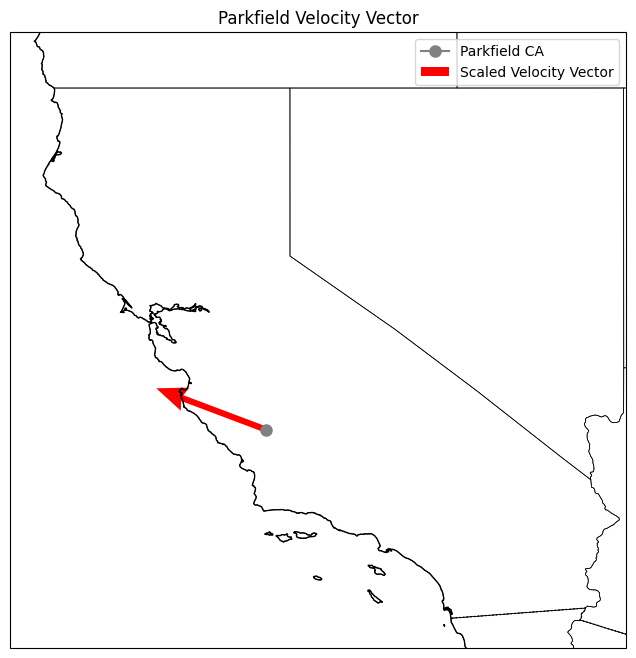

In [ ]:
# Coordinates for Parkfield
latitude = P[0]
longitude = P[1]

# Create a map of California
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-125, -114, 32, 43], crs=ccrs.PlateCarree())  # California extent
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Plot the location point
plt.plot(longitude, latitude, marker='o', color='gray', markersize=8, transform=ccrs.PlateCarree(), label = P[-1])

velocity_x = velocity_magnitude * math.sin(math.radians(azimuth_deg)) / 1e3 #km
velocity_y = velocity_magnitude * math.cos(math.radians(azimuth_deg)) / 1e3 #km

plt.quiver(longitude, latitude, velocity_x*4e8, velocity_y*4e8, transform=ccrs.PlateCarree(), color='red', scale=100, width = 0.01, label='Scaled Velocity Vector', headwidth = 4)

# Add labels and legend
plt.title('Parkfield Velocity Vector')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.show()


##Exercise 2
The formation of a tectonic plate at a spreading center can be considered as a classical problem in diffusion and advection of heat. In this case, the Earth’s surface can be considered as a half-space that is cooling from the top and carrying heat away from the spreading center via advection. We derived the solution for a half space cooling model with heat flow from below, advected heat, and a thermal temperature gradient in both the vertical, z, and horizontal, x, direction relative to a plate tectonic spreading ridge.

This problem can be described as a classical diffusion equation:

$$
\frac{\partial{T}}{\partial{t_{age}}} = \kappa (\frac{\partial^2 T}{\partial^2 z})
$$

Where $T$ is temperature, $t_{age}$ is plate age, $\kappa$ is thermal diffusivity and $z$ is depth from the surface of the plate.

The solution of the equation is:

$$
T(z, t_{age}) = T_0 \ \text{erf}(\frac{z}{2\sqrt{\kappa t_{age}}})
$$

Where $\text{erf()}$ is the error funtion and $T_0$ is the initial temperature at the spreading ridge.

###2.0
Verify that the solution of the diffusion equation $\ \ \frac{\partial{T}}{\partial{t}} = \kappa (\frac{\partial^2 T}{\partial^2 z}) \ \ $ is $\ \ T(z, t) = T_0 \ \text{erf}(\frac{z}{2\sqrt{\kappa t}})$.

We need to prove that the first derivative of $T$ with respect to $t$ is equal to the second derivative of $T$ with respect to $z$ multiplied by $\kappa$.

---
**First derivative of $T$ with respect to $t$**

$
\frac{dT}{dt} = T_0 \frac{d}{dt} \left( \text{erf} \left( \frac{z}{2\sqrt{\kappa t}} \right) \right) =
$

$
= \frac{2}{\sqrt{\pi}} T_0 \frac{d}{dt} \left( \frac{z}{2\sqrt{\kappa t}} \right) e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } =
$

$
= \frac{2}{\sqrt{\pi}} T_0 \left( \frac{z}{2\sqrt{\kappa}} \right) \frac{d}{dt} \left( \frac{1}{\sqrt{t}} \right) e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } =
$

$
= - \frac{T_0 z}{2 \sqrt{\pi \kappa t^3}}  e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 }
$

---
**Second derivative of $T$ with respect to $z$**


$
\frac{dT}{dz} = T_0 \frac{d}{dz} \text{erf} \left( \frac{z}{2\sqrt{\kappa t}} \right) =
$

$
= \frac{2}{\sqrt{\pi}} T_0 \frac{1}{2\sqrt{\kappa t}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } =
$

$
= \frac{T_0}{\sqrt{\pi \kappa t}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 }
$
<br><br>
$
\frac{d^2 T}{dz^2} = \frac{T_0}{\sqrt{\pi \kappa t}} \frac{d}{dz} \left( e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } \right) =
$

$
= \frac{T_0}{\sqrt{\pi \kappa t}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } \frac{d}{dz} \left( - \frac{z^2}{4\kappa t} \right) =
$

$
= - \frac{T_0 z}{2 \sqrt{\pi} \kappa^{3/2} t^{3/2}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 }
$

---

$
\kappa \frac{d^2 T}{dz^2} = - \kappa \frac{T_0 z}{2 \sqrt{\pi} \kappa^{3/2} t^{3/2}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 }
$
$
= -\frac{T_0}{\sqrt{\pi \kappa t^3}} e^{ -\left( \frac{z}{2\sqrt{\kappa t}} \right)^2 } = \frac{dT}{dt}
$

→
$
\frac{dT}{dt} = \kappa \frac{d^2 T}{dz^2}
$


###2.1
Determine the equation for the 600°C isotherm for To = 1350°C and k = 1x10-6 m^2/s.

Then plot the isotherm from 0 to 60 Ma.

To find the equation $z(t_{age})$ for the $\ \bar{T} = 600°C\ $ isotherm we nee to treat $\ T(z, t_{age}) = T_0 \ \text{erf}(\frac{z}{2\sqrt{\kappa t_{age}}})$ as a constant: $T(z, t_{age}) = \bar{T}$.

$
\bar{T} = T_0 \ \text{erf}(\frac{z}{2\sqrt{\kappa t_{age}}}) →
$

$
→ \frac{\bar{T}}{T_0} = \text{erf}(\frac{z}{2\sqrt{\kappa t_{age}}}) →
$

$
→ \text{erf}^{-1}(\frac{\bar{T}}{T_0}) = \frac{z}{2\sqrt{\kappa t_{age}}} →
$

$
→ z(t_{age}) =   {2\sqrt{\kappa t_{age}}} \cdot {\text{erf}^{-1}(\frac{\bar{T}}{T_0})}
$

In [ ]:
def z (t, k, T0, T):
  return 2*np.sqrt(k*t)*erfinv(T/T0)

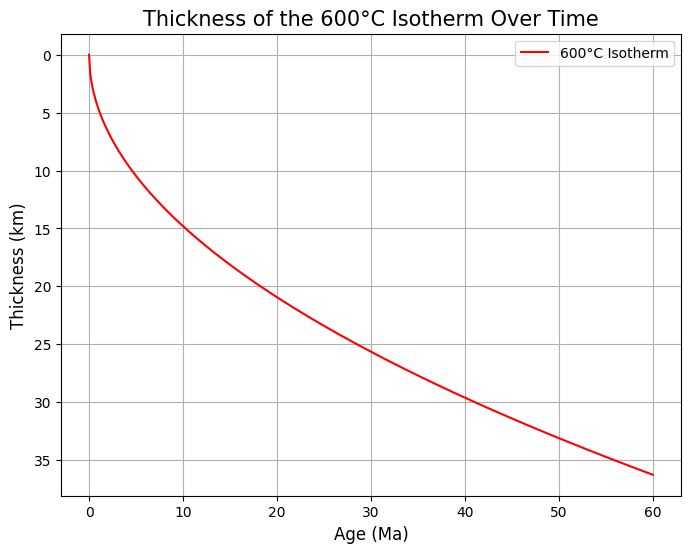

Thickness of the 600°C isotherm at 10 Ma is 14.81 km
Thickness of the 600°C isotherm at 20 Ma is 20.94 km
Thickness of the 600°C isotherm at 30 Ma is 25.65 km
Thickness of the 600°C isotherm at 40 Ma is 29.62 km
Thickness of the 600°C isotherm at 50 Ma is 33.11 km
Thickness of the 600°C isotherm at 60 Ma is 36.27 km


In [ ]:
T0 = 1350
k = 1e-6
T = 600
ma_to_sec = 1e6 * 365.25 * 24 * 3600

t = np.linspace(0, 60, 500)  # in Ma
z_values = z(t*ma_to_sec, k, T0, T)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, z_values/1e3, "red", label = f'{T}°C Isotherm')  # Convert to km for better readability
plt.gca().invert_yaxis() #Invert y axis
plt.xlabel("Age (Ma)", fontsize = 12)
plt.ylabel("Thickness (km)", fontsize = 12)
plt.title(f'Thickness of the {T}°C Isotherm Over Time', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

for i in range(10,61,10):
  print(f"Thickness of the {T}°C isotherm at {i} Ma is {round(z(i*ma_to_sec, k, T0, T)/1e3, 2)} km")

### 2.2
The plot below shows a case for which the plate begins to form at a temperature To = 1300 °C and the thermal diffusivity k = 1x10-6 m2/s.
What is the temperature of the isotherm shown?
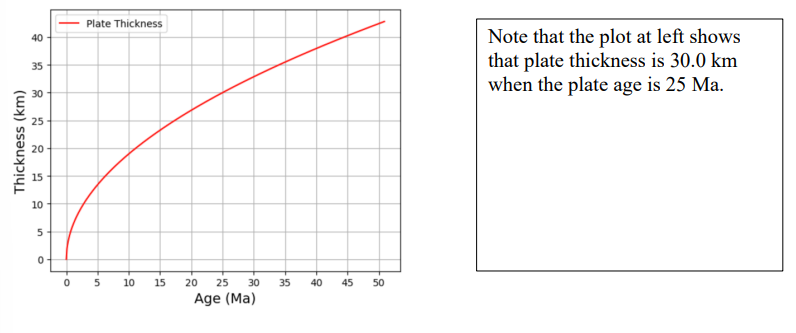

$\tilde{T} = T_0 \text{erf}(\frac{z}{2\sqrt{\kappa t_{age}}}) = 1300°C \cdot \text{erf}(\frac{30\text{km}}{2\sqrt{1\cdot 10^{-6} \cdot 25 \text{Ma}}}) $

In [ ]:
tildeT = 1300 * erf(30e3 / (2 * math.sqrt(1e-6 * 25 * ma_to_sec)))
print(f"{tildeT:.2f}°C")

714.86°C


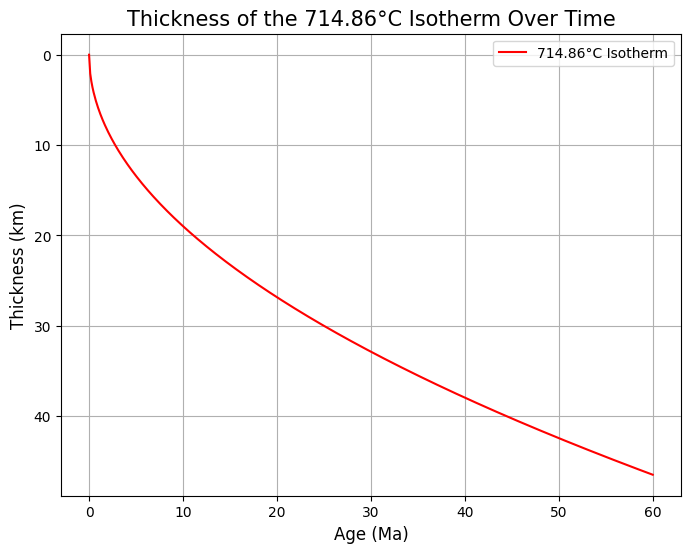

Thickness of the 714.86°C isotherm at 10 Ma is 18.97 km
Thickness of the 714.86°C isotherm at 20 Ma is 26.83 km
Thickness of the 714.86°C isotherm at 30 Ma is 32.86 km
Thickness of the 714.86°C isotherm at 40 Ma is 37.95 km
Thickness of the 714.86°C isotherm at 50 Ma is 42.43 km
Thickness of the 714.86°C isotherm at 60 Ma is 46.48 km


In [ ]:
T0 = 1300
k = 1e-6
ma_to_sec = 1e6 * 365.25 * 24 * 3600

t = np.linspace(0, 60, 500)  # in Ma
z_values = z(t*ma_to_sec, k, T0, tildeT)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, z_values/1e3, "red", label = f'{tildeT:.2f}°C Isotherm')  # Convert to km for better readability
plt.gca().invert_yaxis() #Invert y axis
plt.xlabel("Age (Ma)", fontsize = 12)
plt.ylabel("Thickness (km)", fontsize = 12)
plt.title(f'Thickness of the {tildeT:.2f}°C Isotherm Over Time', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

for i in range(10,61,10):
  print(f"Thickness of the {tildeT:.2f}°C isotherm at {i} Ma is {round(z(i*ma_to_sec, k, T0, tildeT)/1e3, 2)} km")